In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns

In [12]:
G_disaster = pd.read_csv(r'C:\Users\34635\OneDrive\Escritorio\Porgramar\Git_Repositorios\MachineL\archive(1)\global_disaster_response_2018_2024.csv')

In [20]:
G_disaster.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


In [19]:
G_disaster.shape

(50000, 12)

In [13]:
G_disaster.columns

Index(['date', 'country', 'disaster_type', 'severity_index', 'casualties',
       'economic_loss_usd', 'response_time_hours', 'aid_amount_usd',
       'response_efficiency_score', 'recovery_days', 'latitude', 'longitude'],
      dtype='object')

In [14]:
G_disaster.isna().sum()

date                         0
country                      0
disaster_type                0
severity_index               0
casualties                   0
economic_loss_usd            0
response_time_hours          0
aid_amount_usd               0
response_efficiency_score    0
recovery_days                0
latitude                     0
longitude                    0
dtype: int64

In [18]:
G_disaster.dtypes

date                          object
country                       object
disaster_type                 object
severity_index               float64
casualties                     int64
economic_loss_usd            float64
response_time_hours          float64
aid_amount_usd               float64
response_efficiency_score    float64
recovery_days                  int64
latitude                     float64
longitude                    float64
dtype: object

In [24]:
G_disaster['country'].nunique()

20

In [21]:
G_disaster['date'].dtype

dtype('O')

## Poner bien la fecha.

In [26]:
# Convertir la columna date a datetime
G_disaster['date'] = pd.to_datetime(G_disaster['date'], format="%d-%m-%Y", errors='coerce')  # ejemplo formato: "%Y-%m-%d"




In [27]:
G_disaster['date'].head

<bound method NDFrame.head of 0       2021-01-31
1       2018-12-23
2       2020-08-10
3       2022-09-15
4       2022-09-28
           ...    
49995   2019-05-14
49996   2020-10-30
49997   2019-04-27
49998   2022-10-09
49999   2023-01-12
Name: date, Length: 50000, dtype: datetime64[ns]>

## Transformar Variables.


In [28]:

cat_cols = ['country', 'disaster_type']
for col in cat_cols:
    G_disaster[col] = G_disaster[col].astype('category')

# Verificar de nuevo tipos
G_disaster.dtypes


date                         datetime64[ns]
country                            category
disaster_type                      category
severity_index                      float64
casualties                            int64
economic_loss_usd                   float64
response_time_hours                 float64
aid_amount_usd                      float64
response_efficiency_score           float64
recovery_days                         int64
latitude                            float64
longitude                           float64
dtype: object

In [30]:
f32=['severity_index','economic_loss_usd','response_time_hours','aid_amount_usd','response_time_hours','latitude','longitude','response_efficiency_score']
for f in f32:
    G_disaster[f]=G_disaster[f].astype('float32')

G_disaster.dtypes

date                         datetime64[ns]
country                            category
disaster_type                      category
severity_index                      float32
casualties                            int64
economic_loss_usd                   float32
response_time_hours                 float32
aid_amount_usd                      float32
response_efficiency_score           float32
recovery_days                         int64
latitude                            float32
longitude                           float32
dtype: object

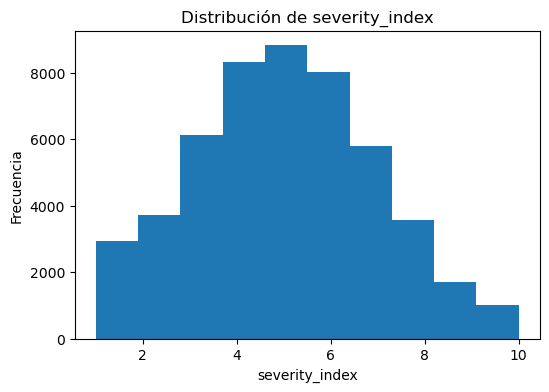

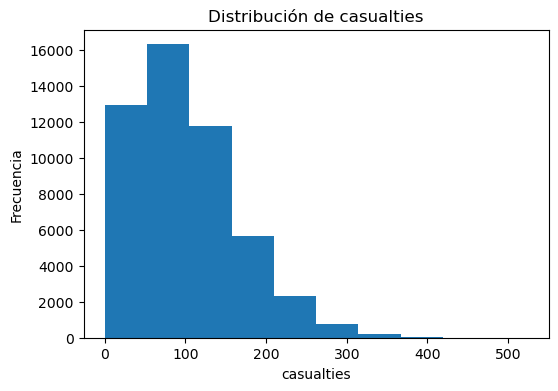

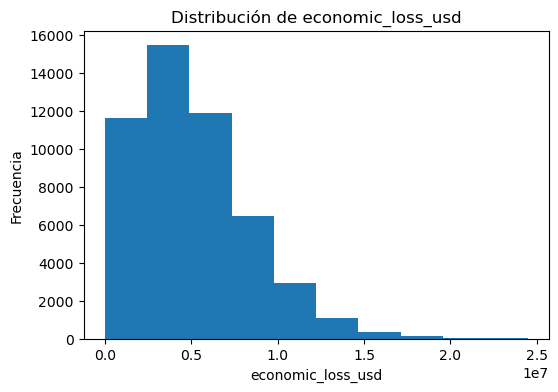

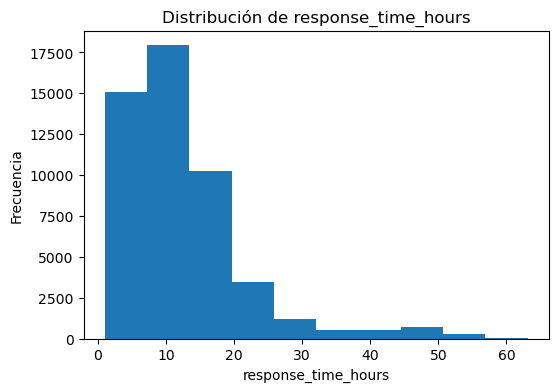

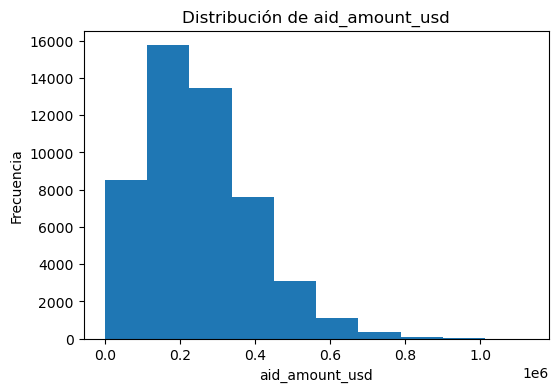

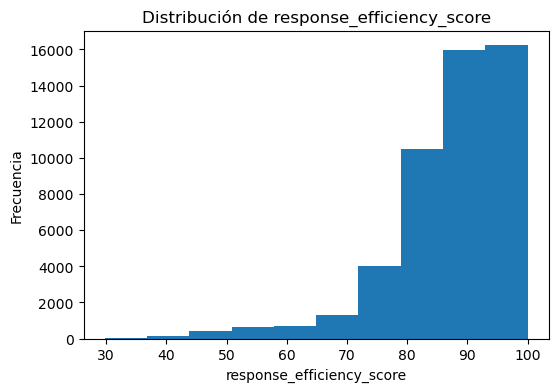

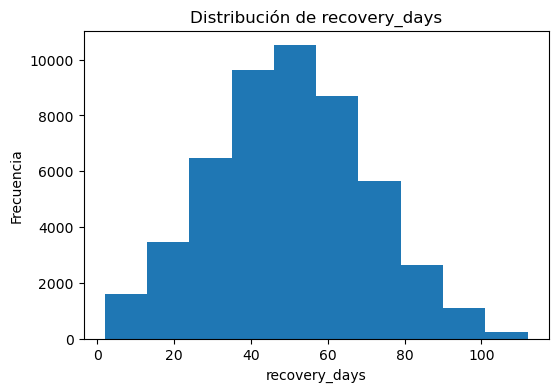

In [33]:
num_cols = ['severity_index', 'casualties', 'economic_loss_usd',
            'response_time_hours', 'aid_amount_usd',
            'response_efficiency_score', 'recovery_days']

for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(G_disaster[col])
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


In [39]:
G_disaster['country'].value_counts().head(10)

country
Brazil        2591
Australia     2563
Turkey        2554
Bangladesh    2553
Spain         2543
China         2539
Chile         2529
Nigeria       2528
Germany       2526
India         2509
Name: count, dtype: int64

In [40]:
G_disaster['disaster_type'].value_counts()

disaster_type
Landslide            5130
Earthquake           5068
Flood                5039
Hurricane            5002
Extreme Heat         5001
Storm Surge          4988
Volcanic Eruption    4983
Wildfire             4954
Tornado              4939
Drought              4896
Name: count, dtype: int64

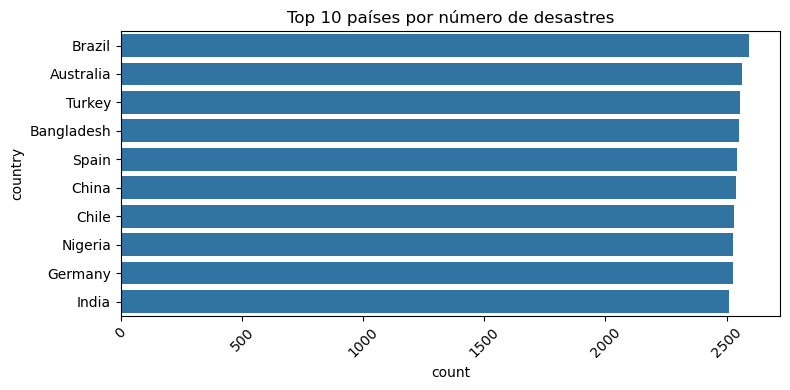

In [67]:
top_countries = G_disaster['country'].value_counts().head(10).index

G_disaster_top_countries = G_disaster[G_disaster['country'].isin(top_countries)]
plt.figure(figsize=(8,4))
sns.countplot(
    data=G_disaster_top_countries,
    y='country',
    order=top_countries
)

plt.xticks(rotation=45)
plt.title('Top 10 países por número de desastres')
plt.tight_layout()
plt.show()


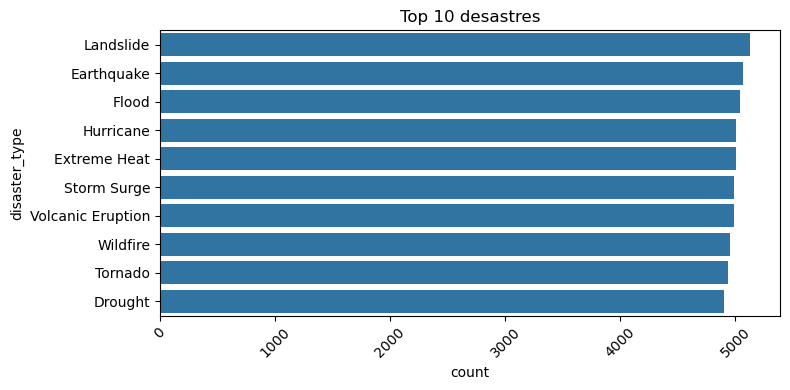

In [70]:
top_disaster = G_disaster['disaster_type'].value_counts().head(10).index

G_disaster_top_disaster = G_disaster[G_disaster['disaster_type'].isin(top_disaster)]

plt.figure(figsize=(8,4))
sns.countplot(
    data=G_disaster_top_disaster,
    y='disaster_type',
    order=top_disaster
)

plt.xticks(rotation=45)
plt.title('Top 10 desastres')
plt.tight_layout()
plt.show()

In [73]:
num_cols = G_disaster.select_dtypes(include='number').columns
num_cols


Index(['severity_index', 'casualties', 'economic_loss_usd',
       'response_time_hours', 'aid_amount_usd', 'response_efficiency_score',
       'recovery_days', 'latitude', 'longitude'],
      dtype='object')

In [74]:
corr = G_disaster[num_cols].corr(method='pearson')
corr


,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
severity_index,1.000000,0.601808,0.601611,-0.676265,0.671538,0.600417,0.968534,0.004979,0.005499
casualties,0.601808,1.000000,0.373459,-0.405880,0.401697,0.359054,0.581541,0.003702,-0.003863
economic_loss_usd,0.601611,0.373459,1.000000,-0.406406,0.400094,0.360331,0.581612,0.005411,-0.000795
response_time_hours,-0.676265,-0.405880,-0.406406,1.000000,-0.455038,-0.886584,-0.654478,-0.005173,-0.003151
aid_amount_usd,0.671538,0.401697,0.400094,-0.455038,1.000000,0.404442,0.649868,0.001030,0.006108
response_efficiency_score,0.600417,0.359054,0.360331,-0.886584,0.404442,1.000000,0.579997,0.004077,0.003919
recovery_days,0.968534,0.581541,0.581612,-0.654478,0.649868,0.579997,1.000000,0.003866,0.004028
latitude,0.004979,0.003702,0.005411,-0.005173,0.001030,0.004077,0.003866,1.000000,0.004436
longitude,0.005499,-0.003863,-0.000795,-0.003151,0.006108,0.003919,0.004028,0.004436,1.000000


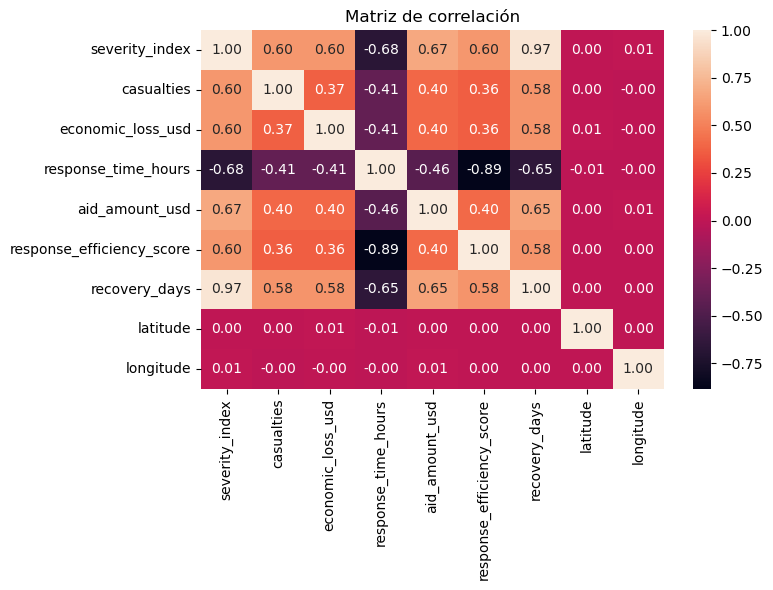

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = G_disaster.select_dtypes(include='number').corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,      
    fmt=".2f",       
    cmap="rocket"   # opcional: mapa de color
)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()



In [78]:
G_disaster.dtypes

date                         datetime64[ns]
country                            category
disaster_type                      category
severity_index                      float32
casualties                            int64
economic_loss_usd                   float32
response_time_hours                 float32
aid_amount_usd                      float32
response_efficiency_score           float32
recovery_days                         int64
latitude                            float32
longitude                           float32
dtype: object

In [79]:
num_cols = [
    'severity_index', 'casualties', 'economic_loss_usd',
    'response_time_hours', 'aid_amount_usd',
    'response_efficiency_score', 'recovery_days',
    'latitude', 'longitude'
]

tabla1_desc = G_disaster[num_cols].describe()
  # pon aquí si quieres include o percentiles personalizados
tabla1_desc


,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
count,50000.000000,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.015769,100.591140,5.068594e+06,12.183027,2.500003e+05,87.574028,49.682560,0.231205,0.089889
std,1.942835,65.052064,3.268529e+06,9.258894,1.432269e+05,10.189068,20.098944,34.759632,98.380135
min,1.000000,0.000000,5.273900e+02,1.000000,1.660000e+01,29.750000,2.000000,-59.993999,-169.998001
25%,3.660000,51.000000,2.585513e+06,6.270000,1.429663e+05,83.059998,36.000000,-29.848250,-85.551752
50%,4.990000,91.000000,4.548351e+06,10.510000,2.305365e+05,89.180000,49.000000,0.267500,0.390500
75%,6.340000,138.000000,6.950614e+06,15.450000,3.352259e+05,94.699997,63.000000,30.488251,85.665001
max,10.000000,524.000000,2.445624e+07,63.099998,1.126465e+06,100.000000,112.000000,59.997002,169.998993


In [81]:
G_disaster['year'] = G_disaster['date'].dt.year     

In [82]:
tabla2_country = (
    G_disaster['country']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'country', 'country': 'n_events'})
)

tabla2_country.head()  


,n_events,count
0,Brazil,2591
1,Australia,2563
2,Turkey,2554
3,Bangladesh,2553
4,Spain,2543


In [83]:
tabla3_type = (
    G_disaster['disaster_type']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'disaster_type', 'disaster_type': 'n_events'})
)

tabla3_type.head(5)


,n_events,count
0,Landslide,5130
1,Earthquake,5068
2,Flood,5039
3,Hurricane,5002
4,Extreme Heat,5001


In [84]:
tabla4_sev_cas = (
    G_disaster
    .groupby('disaster_type')
    .agg(
        severity_mean = ('severity_index', 'mean'),
        casualties_mean = ('casualties', 'mean'),
        casualties_median = ('casualties', 'median')
    )
    .reset_index()
    .sort_values(by='severity_mean', ascending=False)
)

tabla4_sev_cas.head()


C:\Users\34635\AppData\Local\Temp\ipykernel_34228\3089048264.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,disaster_type,severity_mean,casualties_mean,casualties_median
7,Tornado,5.081946,102.207329,91.0
8,Volcanic Eruption,5.058509,100.546257,90.0
9,Wildfire,5.046603,101.220024,91.0
5,Landslide,5.028793,100.584600,90.0
6,Storm Surge,5.023871,101.259623,92.0


In [88]:
tabla5_econ_country = (
    G_disaster
    .groupby('country')
    .agg(
        total_loss = ('economic_loss_usd', 'sum'),
        mean_loss  = ('economic_loss_usd', 'mean'),
        total_aid  = ('aid_amount_usd', 'sum')
    )
    .reset_index()
    .sort_values(by='total_loss', ascending=False)
)

tabla5_econ_country.head()

C:\Users\34635\AppData\Local\Temp\ipykernel_34228\3180746114.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,country,total_loss,mean_loss,total_aid
2,Brazil,1.320587e+10,5096822.5,650405312.0
1,Bangladesh,1.302649e+10,5102424.5,636936064.0
16,South Africa,1.295759e+10,5189263.5,634119104.0
11,Italy,1.290836e+10,5157155.5,628026304.0
5,China,1.285750e+10,5064000.0,636361472.0


In [ ]:
tabala6_time_type =(G_disaster.groupby('disaster_type')).agg(
    respon
)

In [89]:
tabla_6_time_type=(G_disaster.groupby('disaster_type')).agg(
    response_time_mean = ('response_time_hours','mean'),
      response_time_median = ('response_time_hours', 'median'),
        recovery_days_mean = ('recovery_days', 'media'),
        recovery_days_median = ('recovery_days', 'median')
    ).reset_index()
    .sort_values(by='response_time_mean', ascending=False)
)

tabla6_time_type.head()
)

IndentationError: unexpected indent (3488975689.py, line 7)